<a href="https://colab.research.google.com/github/Ajlag/cifar10_neural_network/blob/main/emocije_projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from google.colab import files
upload = files.upload()

Saving emotionsproba.csv to emotionsproba (1).csv


In [35]:
#ucitavanje dataseta
df = pd.read_csv('emotionsproba.csv')

In [36]:
df.head(10)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
5,5,i was beginning to feel quite disheartened,0
6,6,i would think that whomever would be lucky eno...,2
7,7,i fear that they won t ever feel that deliciou...,1
8,8,im forever taking some time out to have a lie ...,5
9,9,i can still lose the weight without feeling de...,0


In [37]:
df.columns

Index(['Unnamed: 0', 'text', 'label'], dtype='object')

In [38]:
#brisanje jedne viska kolone
df.drop(columns='Unnamed: 0', inplace=True)

In [39]:
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (28202, 2)


In [40]:
#priprema podataka, provera duplikacata
df.duplicated().sum()

4

In [41]:
#brisanje duplicata
df = df.drop_duplicates()

In [42]:
df.duplicated().sum()

0

In [43]:
#mapiranje podataka
emotion_map = {
    0: 'tuga',
    1: 'radost',
    2: 'ljubav',
    3: 'ljutnja',
    4: 'strah',
    5: 'iznenadjeno'
}

df['label']=df['label'].map(emotion_map)

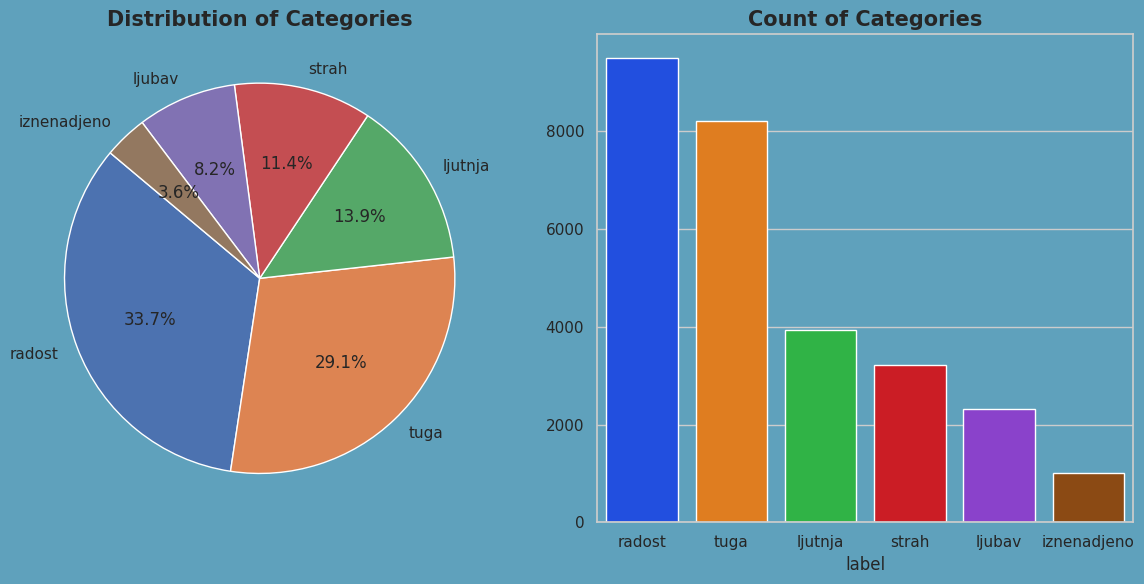

In [44]:
count = df['label'].value_counts()

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor=background_color)

# Plot pie chart on the first subplot
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories', fontsize=15, fontweight='bold')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories', fontsize=15, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
#definisanje recnika za reci
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [46]:
#zamena skracenica sa punim recima
def replace_chat_words(text):
    words=text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

df['text'] = df['text'].apply(replace_chat_words)

In [47]:
df['text']=df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

df.head()

,text,label
0,i just feel really helpless and heavy hearted,strah
1,ive enjoyed being able to slouch about relax a...,tuga
2,i gave up my internship with the dmrg and am f...,strah
3,i dont know i feel so lost,tuga
4,i am a kindergarten teacher and i am thoroughl...,strah


In [48]:
stop = stopwords.words('english')
df["text"] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.head()

,text,label
0,feel really helpless heavy hearted,strah
1,ive enjoyed able slouch relax unwind frankly n...,tuga
2,gave internship dmrg feeling distraught,strah
3,dont know feel lost,tuga
4,kindergarten teacher thoroughly weary job take...,strah


In [49]:
#prebacivanje u mala slova
df['text'] = df['text'].str.lower()
print(df.head())

                                                text  label
0                 feel really helpless heavy hearted  strah
1  ive enjoyed able slouch relax unwind frankly n...   tuga
2            gave internship dmrg feeling distraught  strah
3                                dont know feel lost   tuga
4  kindergarten teacher thoroughly weary job take...  strah


In [50]:
#remove number
df['text'] = df['text'].str.replace(r'\d+','', regex=True)
df.head()

,text,label
0,feel really helpless heavy hearted,strah
1,ive enjoyed able slouch relax unwind frankly n...,tuga
2,gave internship dmrg feeling distraught,strah
3,dont know feel lost,tuga
4,kindergarten teacher thoroughly weary job take...,strah


In [51]:
#brisanje praznog prostora
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)
print(df.head())

                                                text  label
0                 feel really helpless heavy hearted  strah
1  ive enjoyed able slouch relax unwind frankly n...   tuga
2            gave internship dmrg feeling distraught  strah
3                                dont know feel lost   tuga
4  kindergarten teacher thoroughly weary job take...  strah


In [52]:
label_mapping ={'tuga':0, 'radost': 1, 'ljubav':2,'ljutnja': 3,'strah':4,'iznenadjeno': 5}

#preimenovanje label koriscenjem nasih reci
df['label'] = df['label'].map(label_mapping)

In [53]:
#treniranje podataka
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ", X_test.shape)
print("The shape of y_train is ", y_train.shape)
print("The shape of y_test is ", y_test.shape)

The shape of X_train is  (22558,)
The shape of X_test is  (5640,)
The shape of y_train is  (22558,)
The shape of y_test is  (5640,)


In [54]:
#tokenizacija
tokenizer = Tokenizer(num_words=60000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [55]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [56]:
# Maximum Length in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 46


In [57]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [67]:
# Embedding Input Size
input_size = np.max(X_train_padded) + 1
input_size
vocab_size = len(tokenizer.word_index)+1

In [68]:
#definise se model
model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=100,input_shape=(46,)))

model.add(Bidirectional(LSTM(128)))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [69]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 46, 100)           2052700   
                                                                 
 bidirectional_3 (Bidirecti  (None, 256)               234496    
 onal)                                                           
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)               

In [70]:
# Model Train

print("Dimenzije X_train_padded:", X_train_padded.shape)
print("Dimenzije X_test_padded:", X_test_padded.shape)
history = model.fit(X_train_padded,
                    y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_test_padded, y_test),
                    callbacks=[EarlyStopping(patience=3)])

Dimenzije X_train_padded: (22558, 46)
Dimenzije X_test_padded: (5640, 46)
Epoch 1/15
705/705 [==============================] - 132s 181ms/step - loss: 0.8694 - accuracy: 0.6913 - val_loss: 1.2255 - val_accuracy: 0.6284
Epoch 2/15
705/705 [==============================] - 131s 186ms/step - loss: 0.3150 - accuracy: 0.8970 - val_loss: 0.4636 - val_accuracy: 0.8580
Epoch 3/15
705/705 [==============================] - 130s 185ms/step - loss: 0.1955 - accuracy: 0.9340 - val_loss: 0.6042 - val_accuracy: 0.8115
Epoch 4/15
705/705 [==============================] - 126s 179ms/step - loss: 0.1511 - accuracy: 0.9481 - val_loss: 0.3220 - val_accuracy: 0.8910
Epoch 5/15
705/705 [==============================] - 139s 197ms/step - loss: 0.1223 - accuracy: 0.9572 - val_loss: 0.3376 - val_accuracy: 0.8757
Epoch 6/15
705/705 [==============================] - 137s 195ms/step - loss: 0.0969 - accuracy: 0.9648 - val_loss: 0.3418 - val_accuracy: 0.8986
Epoch 7/15
705/705 [==============================

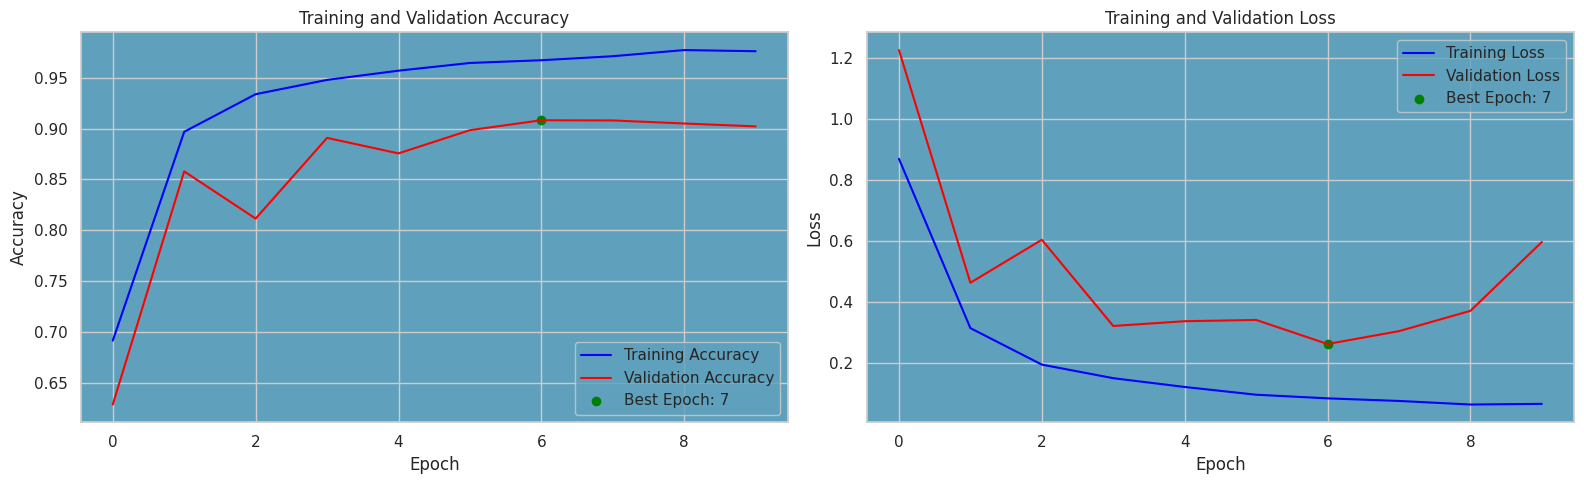

In [71]:
# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [72]:
# Evaluate Test Data
model.evaluate(X_test_padded, y_test)

177/177 [==============================] - 8s 45ms/step - loss: 0.5972 - accuracy: 0.9023


[0.5971903204917908, 0.9023049473762512]